# Make an inventory of downloaded data
- Spatial Extent
- Temporal Extent
- type of data

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (12, 7), 'font.size': 10})

import hvplot
import hvplot.pandas
import geoviews as gv

In [3]:
regions = [f for f in os.listdir(f'/fs/project/howat.4/icesat2/antarctica_ATL06') if f.startswith('rema_')]
print(regions)

['rema_07_qml_ne', 'rema_08_qml_se', 'rema_09_qml_nw', 'rema_11_amery_shelf', 'rema_13_wilkes_land_ne', 'rema_17_wilkes_land_nw', 'rema_21_mbl_north', 'rema_02_peninsula_north', 'rema_03_peninsula_south', 'rema_04_ronne_shelf', 'rema_05_ellsworth_land', 'rema_06_luitpold_coast', 'rema_15_wilkes_land_nc', 'rema_10_qml_sw', 'rema_12_american_highland', 'rema_14_wilkes_land_se', 'rema_16_wilkes_land_sc', 'rema_19_victoria_land', 'rema_18_wilkes_land_sw', 'rema_22_mbl_central', 'rema_20_ross_shelf', 'rema_24_ctam', 'rema_27_qml_south', 'rema_25_mbl_south', 'rema_23_siple_coast', 'rema_01_subantarctic_islands']


In [4]:
region = regions[0]
gdf = gpd.read_file(f'/fs/project/howat.4/icesat2/antarctica_ATL06/metadata/{region}.shp')
gdf['region'] = region
for region in regions[1:]:
    print(region)
    #shp = f'/fs/project/howat.4/icesat2/prototyping/metadata/{region}.shp'
    tmp = gpd.read_file(f'/fs/project/howat.4/icesat2/antarctica_ATL06/metadata/{region}.shp')
    tmp['region'] = region
    gdf = pd.concat([gdf, tmp])
# Save the merged product
# Convert Polar Stereographic projection south
gdf = gdf.to_crs('EPSG:3412')
gdf.to_file(f'/fs/project/howat.4/icesat2/antarctica_ATL06/metadata/regions.shp')

rema_08_qml_se
rema_09_qml_nw
rema_11_amery_shelf
rema_13_wilkes_land_ne
rema_17_wilkes_land_nw
rema_21_mbl_north
rema_02_peninsula_north
rema_03_peninsula_south
rema_04_ronne_shelf
rema_05_ellsworth_land
rema_06_luitpold_coast
rema_15_wilkes_land_nc
rema_10_qml_sw
rema_12_american_highland
rema_14_wilkes_land_se
rema_16_wilkes_land_sc
rema_19_victoria_land
rema_18_wilkes_land_sw
rema_22_mbl_central
rema_20_ross_shelf
rema_24_ctam
rema_27_qml_south
rema_25_mbl_south
rema_23_siple_coast
rema_01_subantarctic_islands


In [5]:
gdf['date'] = gdf.date.apply(lambda x: pd.to_datetime(x))
gdf.date.min(), gdf.date.max(), gdf.date.max() - gdf.date.min()

(Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-02-28 00:00:00'),
 Timedelta('89 days 00:00:00'))

In [23]:
# gdf.pt_count.plot(kind='hist', bins=100);
tmp.head()

name  pt_count      date  \
0  processed_ATL06_20190224224632_08930210_003_01        15  20190224   
1  processed_ATL06_20190227121714_09320212_003_01       561  20190227   
2  processed_ATL06_20181202162854_09930112_003_01        49  20181202   
3  processed_ATL06_20181201040649_09700110_003_01      6666  20181201   
4  processed_ATL06_20181208152916_10840112_003_01        32  20181208   

                                            geometry  \
0  POLYGON ((-27.06983 -56.68007, -27.07145 -56.6...   
1  POLYGON ((-45.66698 -61.00761, -45.79214 -61.0...   
2  POLYGON ((-46.52033 -60.98833, -46.54155 -60.8...   
3  POLYGON ((-46.60085 -61.00513, -46.66223 -61.0...   
4  POLYGON ((-37.06291 -54.73524, -37.08659 -54.5...   

                         region  
0  rema_01_subantarctic_islands  
1  rema_01_subantarctic_islands  
2  rema_01_subantarctic_islands  
3  rema_01_subantarctic_islands  
4  rema_01_subantarctic_islands

In [22]:
tmp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
len(gdf)

3841

In [8]:
gdf.head()

name  pt_count       date  \
0  processed_ATL06_20181202132019_09910112_003_01    206551 2018-12-02   
1  processed_ATL06_20181201121141_09750112_003_01      3444 2018-12-01   
2  processed_ATL06_20181201134558_09760112_003_01    201357 2018-12-01   
3  processed_ATL06_20181202145437_09920112_003_01     10383 2018-12-02   
4  processed_ATL06_20181203125440_10060112_003_01    211885 2018-12-03   

                                            geometry          region  
0  POLYGON ((169413.685 1512583.789, 169313.010 1...  rema_07_qml_ne  
1  POLYGON ((787390.986 2039517.956, 787462.956 2...  rema_07_qml_ne  
2  POLYGON ((18184.959 1521217.286, 18082.950 152...  rema_07_qml_ne  
3  POLYGON ((-455583.346 1448721.772, -455683.609...  rema_07_qml_ne  
4  POLYGON ((312481.457 1488242.051, 312379.934 1...  rema_07_qml_ne

In [9]:
gdf.crs

<Projected CRS: EPSG:3412>
Name: NSIDC Sea Ice Polar Stereographic South
Axis Info [cartesian]:
- X[north]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - S hemisphere - south of 60°S
- bounds: (-180.0, -90.0, 180.0, -60.0)
Coordinate Operation:
- name: US NSIDC Sea Ice polar stereographic south
- method: Polar Stereographic (variant B)
Datum: Not specified (based on Hughes 1980 ellipsoid)
- Ellipsoid: Hughes 1980
- Prime Meridian: Greenwich

In [10]:
gdf.head()

name  pt_count       date  \
0  processed_ATL06_20181202132019_09910112_003_01    206551 2018-12-02   
1  processed_ATL06_20181201121141_09750112_003_01      3444 2018-12-01   
2  processed_ATL06_20181201134558_09760112_003_01    201357 2018-12-01   
3  processed_ATL06_20181202145437_09920112_003_01     10383 2018-12-02   
4  processed_ATL06_20181203125440_10060112_003_01    211885 2018-12-03   

                                            geometry          region  
0  POLYGON ((169413.685 1512583.789, 169313.010 1...  rema_07_qml_ne  
1  POLYGON ((787390.986 2039517.956, 787462.956 2...  rema_07_qml_ne  
2  POLYGON ((18184.959 1521217.286, 18082.950 152...  rema_07_qml_ne  
3  POLYGON ((-455583.346 1448721.772, -455683.609...  rema_07_qml_ne  
4  POLYGON ((312481.457 1488242.051, 312379.934 1...  rema_07_qml_ne

In [11]:
gdf['mon'] = gdf.date.apply(lambda x: x.month)

In [12]:
gdf['region'] = gdf.region.apply(lambda x: x[5:7])

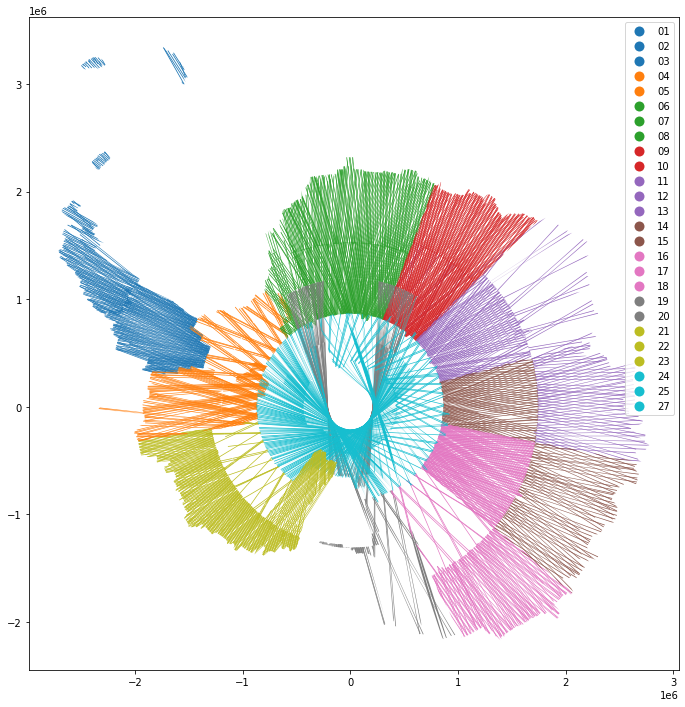

In [13]:
gdf.plot(column='region', figsize=(12, 12), legend=True, categorical=True);

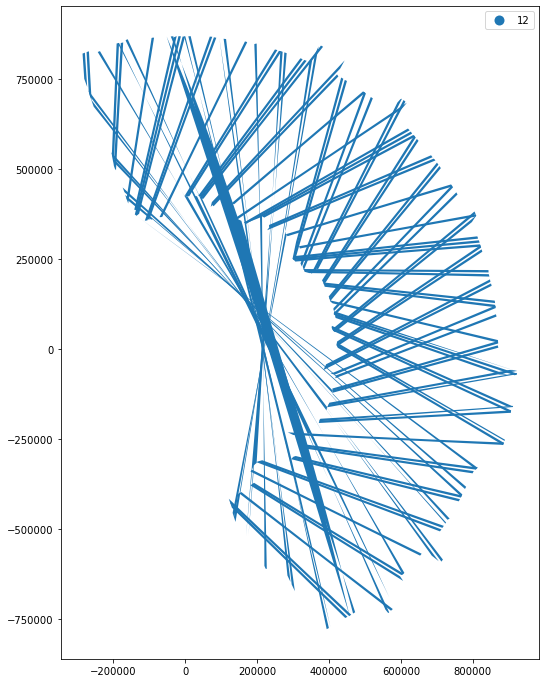

In [14]:
gdf[gdf.region.isin(['27'])].plot(column='mon', figsize=(12, 12), legend=True, categorical=True);

<AxesSubplot:>

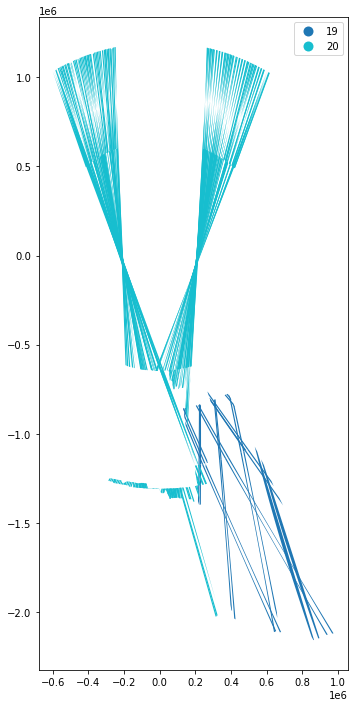

In [15]:
gdf[gdf.region.isin(['19', '20'])].plot(column='region', figsize=(12, 12), legend=True, categorical=True)

<AxesSubplot:>

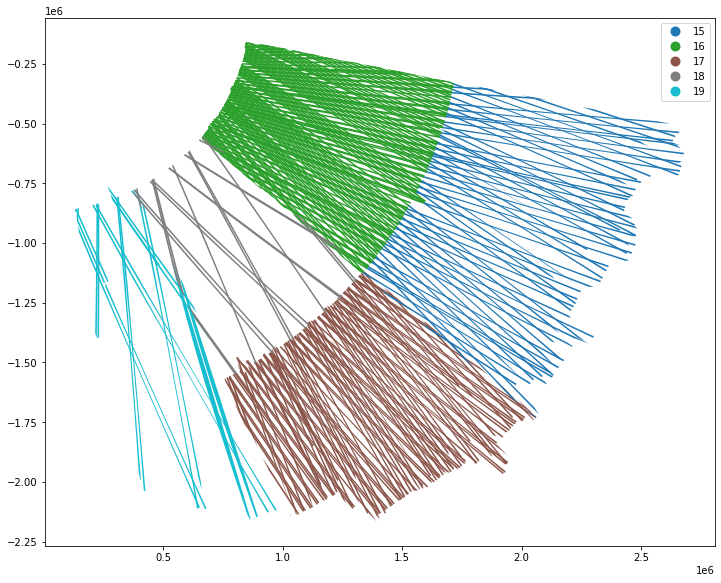

In [17]:
gdf[gdf.region.isin(['15', '16', '17', '18', '19'])].plot(column='region', figsize=(12, 12), legend=True, categorical=True)

In [19]:
!ls /fs/project/howat.4/icesat2/antarctica_ATL06/metadata|grep .shp
# !ls -ltrh /fs/project/howat.4/icesat2/antarctica_ATL06/rema_08_qml_se/

regions.shp
rema_01_subantarctic_islands.shp
rema_02_peninsula_north.shp
rema_03_peninsula_south.shp
rema_04_ronne_shelf.shp
rema_05_ellsworth_land.shp
rema_06_luitpold_coast.shp
rema_07_qml_ne.shp
rema_08_qml_se.shp
rema_09_qml_nw.shp
rema_10_qml_sw.shp
rema_11_amery_shelf.shp
rema_12_american_highland.shp
rema_13_wilkes_land_ne.shp
rema_14_wilkes_land_se.shp
rema_15_wilkes_land_nc.shp
rema_16_wilkes_land_sc.shp
rema_17_wilkes_land_nw.shp
rema_18_wilkes_land_sw.shp
rema_19_victoria_land.shp
rema_20_ross_shelf.shp
rema_21_mbl_north.shp
rema_22_mbl_central.shp
rema_23_siple_coast.shp
rema_24_ctam.shp
rema_25_mbl_south.shp
rema_27_qml_south.shp


In [20]:

rema_13_wilkes_land_ne
rema_17_wilkes_land_nw
rema_02_peninsula_north

rema_02_peninsula_north
rema_03_peninsula_south
rema_04_ronne_shelf
rema_05_ellsworth_land
    Missing shapefiles: rema_05_ellsworth_land
rema_06_luitpold_coast
rema_15_wilkes_land_nc
rema_10_qml_sw
rema_12_american_highland
rema_14_wilkes_land_se
rema_16_wilkes_land_sc
rema_19_victoria_land
    Missing shapefiles: rema_19_victoria_land
rema_18_wilkes_land_sw
    Missing shapefiles: rema_18_wilkes_land_sw
rema_01_subantarctic_islands


rema_23_siple_coast
    Missing shapefiles: rema_23_siple_coast
rema_27_qml_south
rema_24_ctam
rema_25_mbl_south
rema_21_mbl_north
rema_22_mbl_central
    Missing shapefiles: rema_22_mbl_central
rema_20_ross_shelf

IndentationError: unexpected indent (<ipython-input-20-c61dfa905c1b>, line 9)

In [14]:
gdf1[gdf1.pt_count<10]

name  pt_count  \
48  processed_ATL06_20190108033456_01630210_003_01         1   

                       geometry      date  
48  POINT (-66.98367 -65.85802)  20190108

In [16]:
gdf = gpd.read_file(f'{icesat2_path}/processed_ATL06_20190108033456_01630210_003_01.{shp_ext}', parse_dates=True)

In [17]:
gdf

t_dt        h_li  q_flag strip  \
0  2019-01-08 03:39:44.462000  198.797165       1  gt2l   

                      geometry  
0  POINT (-66.98367 -65.85802)

In [15]:
region

'rema_20_ross_shelf'

In [13]:
base = gv.tile_sources.ESRI
fig = base * outline.hvplot(geo=True, alpha=.2) * gdf1.hvplot(geo=True, alpha=0.7, width=800, height=500) #color='strip', 
base = gv.tile_sources.ESRI
fig

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Polygons.I  :Polygons   [Longitude,Latitude]
   .Polygons.II :Polygons   [Longitude,Latitude]

In [14]:
# Load ATL08 parsed data
df = pd.read_csv(f'{icesat2_path}/{fname}.csv', parse_dates=True)
gdf = gpd.read_file(f'{icesat2_path}/{fname}.{shp_ext}', parse_dates=True)
# Pick only the good quality data [verify if zero or one means good]
# df = df[df.q_flag==0]
# gdf = gdf[gdf.q_flag==0]

gtls = list(df.strip.unique())
print(len(df), gtls)
# gv.tile_sources.ESRI * gdf.hvplot.points(geo=True, color='strip', alpha=0.7, width=500, height=700, hover=['strip', 'h_te_media'])

137438 ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']


In [15]:
len(df)

137438

In [50]:
ch = gdf.geometry.unary_union.convex_hull
ch = gpd.GeoSeries(ch, crs=outline.crs)


<AxesSubplot:>

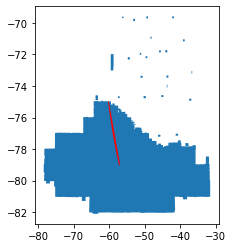

In [47]:
ax =outline.plot()
ch.plot(ax=ax,color='r')

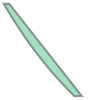

In [16]:
ch.plot('')

In [17]:
!echo $TMPDIR

/tmp//2711200.unity-1.asc.ohio-state.edu


In [18]:
y = gdf.geometry.unary_union.envelope
print(y)

POLYGON ((-60.29405695582228 -79.00604159779911, -56.89335866689649 -79.00604159779911, -56.89335866689649 -74.97437839289114, -60.29405695582228 -74.97437839289114, -60.29405695582228 -79.00604159779911))


In [19]:
x = gpd.GeoDataFrame([ch])

In [20]:
# x.hvplot(geo=True, color='strip', alpha=0.7, width=400, height=500)
type(x)

geopandas.geodataframe.GeoDataFrame